# Survive Prediction using Random Forest

Using the Titanic dataset from [this](https://www.kaggle.com/datasets/brendan45774/test-file) Kaggle.

### Data Dictionary

- **Survival**:	Survival    	0 = No, 1 = Yes
- **Pclass**:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- **Sex**:	Sex
- **Age**:	Age in years
- **Sibsp**:	# of siblings / spouses aboard the Titanic
- **Parch**:	# of parents / children aboard the Titanic
- **Ticket**:	Ticket number
- **Fare**:	Passenger fare
- **Cabin**:	Cabin number
- **Embarked**:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
# Import essential module for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read data
titanic = pd.read_csv('datasets/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean continues variables

1. fill in missing values for `Age`
2. Combine `SibSp` & `Parch`
3. Drop irrelevant/repetitive variables (`SibSp`, `Parch`, `PassengerId`)

#### Fill missing for `Age`


In [4]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

#### Combine `Sibsp` & `Parch`

<Figure size 640x480 with 0 Axes>

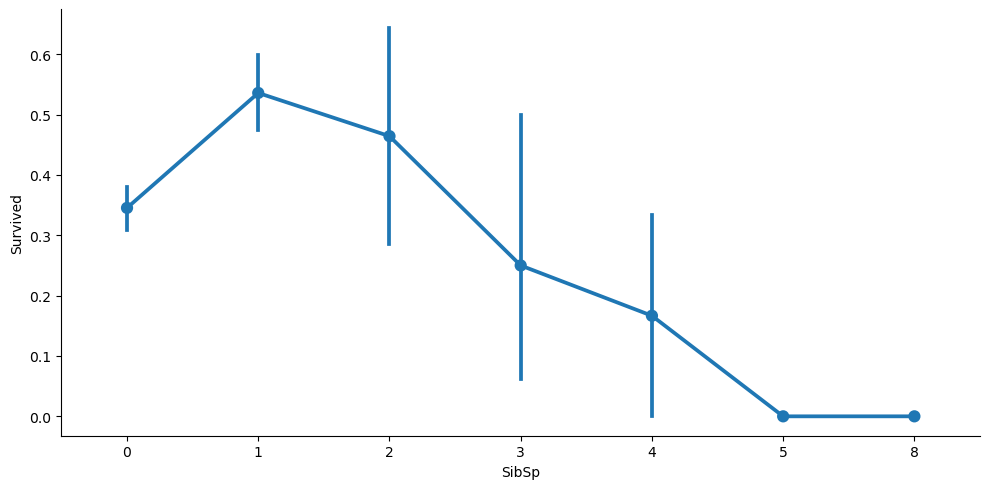

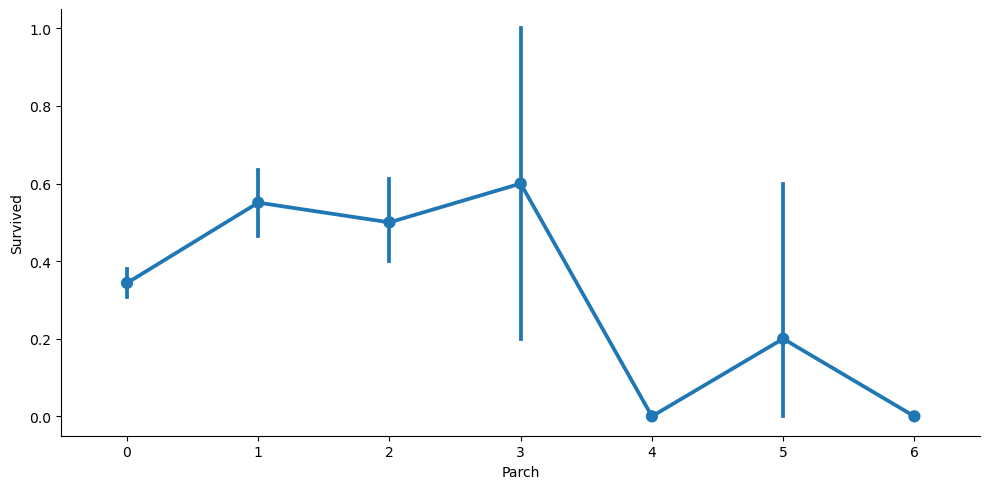

In [6]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

In [7]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

#### Drop unnecessary variables

In [8]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [9]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


#### Write out cleaned data

In [10]:
titanic.to_csv('datasets/titanic_cleaned.csv', index=False)